In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import random

In [2]:
# for using a txt file as a string (str)
# text contain about 11k characters

text = open('Text_eng.txt', 'r').read()

In [3]:
def Naive_algorithm(text, pattern):

  n, m = len(text), len(pattern)
  counter = 0
  start_positions = []

  for i in range(n - m + 1):
    check = True

    for j in range(m):
      if text[i + j] != pattern[j]:
        check = False
        break

    if check == True:
      counter += 1
      start_positions.append(i)

  return counter, start_positions

In [4]:
def RabinKarp_algorithm(text, pattern):

  n, m = len(text), len(pattern)
  hpattern = hash(pattern)
  start_positions = []
  counter = 0

  for i in range(n-m+1):
    hs = hash(text[i:i+m])

    if hs == hpattern:
      if text[i:i+m] == pattern:
        start_positions.append(i)
        counter += 1

  return counter, start_positions

In [5]:
def KMP_algorithm(text, pattern):

  n, m = len(text),len(pattern)
  start_positions = []
  counter = 0

  def prefix_function(s):
    
    P = [0] * len(s)
    i, j = 0, 1
    
    while j < len(s) :
        
      if s[i] == s[j]:
        P[j] = i + 1
        i += 1
        j += 1
      elif i > 0:
        i = P[i - 1]
      else:
        P[j] = 0
        j += 1
            
    return P
    
  P = prefix_function(pattern)   
  i, j = 0, 0
    
  while i < n and j < m:
        
      if text[i] == pattern[j]:
          if j == m - 1:
              start_positions.append(i - m + 1)
              counter += 1
              j = 0
          else:
              j += 1
          i += 1
      elif j > 0:
          j = P[j - 1]
      else:
          i += 1
            
  return counter, start_positions

In [6]:
def timing(text, pattern, n):

  nv_time = []
  rk_time = []
  kmp_time = []

  for i in range(n):

    start_time = time.time()
    nv_res = Naive_algorithm(text, pattern)
    nv_time.append(time.time() - start_time)

    start_time = time.time()
    rk_res = RabinKarp_algorithm(text, pattern)
    rk_time.append(time.time() - start_time)

    start_time = time.time()
    kmp_res = KMP_algorithm(text, pattern)
    kmp_time.append(time.time() - start_time)

  #return 'Average time for Naive Algorithm = ' + str(sum(nv_time) / n) + ' sec.', 'Average time for Rabbin-Karp Algorithm = ' + str(sum(rk_time) / n) + ' sec.'
  return [sum(nv_time) / n, sum(rk_time) / n, sum(kmp_time) / n]

In [7]:
timing(text, 'the', 100)

[0.004826784133911133, 0.003284034729003906, 0.0025838065147399903]

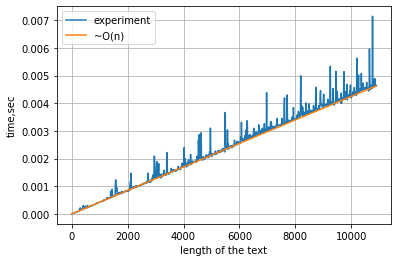

In [12]:
time_array = []
n_array = [i for i in range(1,len(text)+1,10)]

for i in range(1,len(text)+1,10):
  mean_array = []
  for j in range(5):
    start_time = time.time()
    res = Naive_algorithm(text[0:i], 'the')
    mean_array.append(time.time()-start_time)
  time_array.append(sum(mean_array) / 5)

const = time_array[-1] / n_array[-1]
y = [const * i for i in n_array]

plt.plot(n_array,time_array, label='experiment')
plt.plot(n_array, y, label='~O(n)')
plt.legend()
plt.xlabel('length of the text')
plt.ylabel('time,sec')
plt.grid()
plt.show()

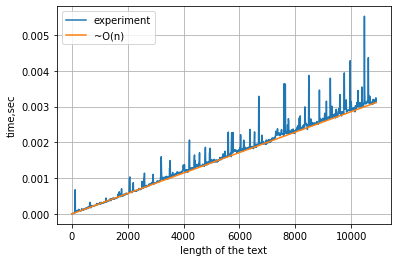

In [10]:
time_array = []
n_array = [i for i in range(1,len(text)+1,10)]

for i in range(1,len(text)+1,10):
  mean_array = []
  for j in range(5):
    start_time = time.time()
    res = RabinKarp_algorithm(text[0:i], 'the')
    mean_array.append(time.time()-start_time)
  time_array.append(sum(mean_array) / 5)

const = time_array[-1] / n_array[-1]
y = [const * i for i in n_array]

plt.plot(n_array,time_array, label='experiment')
plt.plot(n_array, y, label='~O(n)')
plt.legend()
plt.xlabel('length of the text')
plt.ylabel('time,sec')
plt.grid()
plt.show()

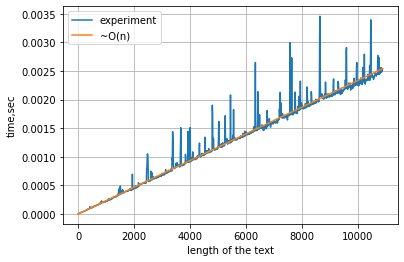

In [11]:
time_array = []
n_array = [i for i in range(1,len(text)+1,10)]

for i in range(1,len(text)+1,10):
  mean_array = []
  for j in range(5):
    start_time = time.time()
    res = KMP_algorithm(text[0:i], 'the')
    mean_array.append(time.time()-start_time)
  time_array.append(sum(mean_array) / 5)

const = time_array[-1] / n_array[-1]
y = [const * i for i in n_array]

plt.plot(n_array,time_array, label='experiment')
plt.plot(n_array, y, label='~O(n)')
plt.legend()
plt.xlabel('length of the text')
plt.ylabel('time,sec')
plt.grid()
plt.show()